# 데이터 정제하기

In [36]:
import pandas as pd
import numpy as np 
import re
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline
rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False  ## 추가해줍니다. 

In [37]:
data = pd.read_csv("/Users/yujinkim/Desktop/2021/3-1학기/응용머신러닝/Final Project/data_05월_서울.csv", header= None, encoding = 'utf-8')
data = data.drop(data.columns[[0]], axis=1)
data = data.rename(columns=data.iloc[0])
data = data.drop(0, axis=0)
data 

,date,hour,menu,city,time
1,2020-05-01,0,배달전문업체,영등포구,16.06
2,2020-05-01,0,분식,구로구,26.92
3,2020-05-01,0,분식,금천구,22.81
4,2020-05-01,0,야식,구로구,33.02
5,2020-05-01,0,야식,금천구,22.75
...,...,...,...,...,...
22401,2020-05-31,23,피자,도봉구,19.76
22402,2020-05-31,23,한식,구로구,21.59
22403,2020-05-31,23,한식,금천구,16.05
22404,2020-05-31,23,한식,영등포구,33.09


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22405 entries, 1 to 22405
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    22405 non-null  object
 1   hour    22405 non-null  object
 2   menu    22405 non-null  object
 3   city    22405 non-null  object
 4   time    22405 non-null  object
dtypes: object(5)
memory usage: 875.3+ KB


In [66]:
# 자료형 변환해주기
data['date'] = data['date'].astype('category')
data['hour'] = data['hour'].astype('category')
data['menu'] = data['menu'].astype('category')
data['city'] = data['city'].astype('category')
data['time'] = data['time'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22405 entries, 1 to 22405
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   date    22405 non-null  category
 1   hour    22405 non-null  category
 2   menu    22405 non-null  category
 3   city    22405 non-null  category
 4   time    22405 non-null  float64 
dtypes: category(4), float64(1)
memory usage: 266.0 KB


In [56]:
# category 타입으로 변환한 결과
d = dict(enumerate(data['city'].cat.categories))
d

{0: '강남구',
 1: '강동구',
 2: '강서구',
 3: '관악구',
 4: '구로구',
 5: '금천구',
 6: '노원구',
 7: '도봉구',
 8: '동작구',
 9: '서대문구',
 10: '서초구',
 11: '양천구',
 12: '영등포구',
 13: '은평구'}

In [57]:
d = dict(enumerate(data['menu'].cat.categories))
d

{0: '도시락',
 1: '돈까스/일식',
 2: '배달전문업체',
 3: '분식',
 4: '심부름',
 5: '아시안/양식',
 6: '야식',
 7: '족발/보쌈',
 8: '중식',
 9: '찜탕',
 10: '치킨',
 11: '카페/디저트',
 12: '패스트푸드',
 13: '피자',
 14: '한식'}

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, '구로구'),
  Text(1, 0, '영등포구'),
  Text(2, 0, '금천구'),
  Text(3, 0, '도봉구'),
  Text(4, 0, '은평구'),
  Text(5, 0, '동작구'),
  Text(6, 0, '양천구'),
  Text(7, 0, '관악구'),
  Text(8, 0, '노원구'),
  Text(9, 0, '강남구'),
  Text(10, 0, '강동구'),
  Text(11, 0, '서초구'),
  Text(12, 0, '서대문구'),
  Text(13, 0, '강서구')])

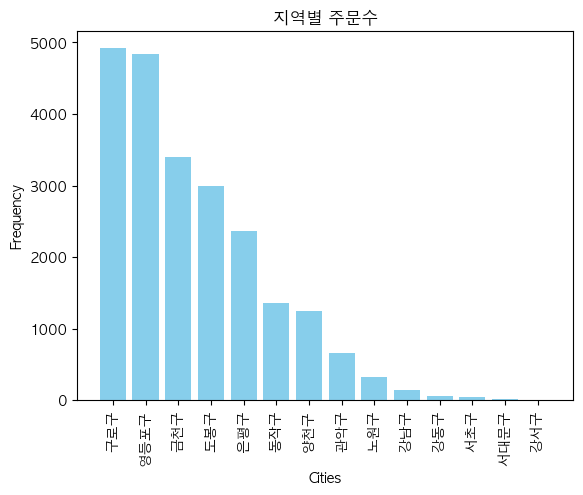

In [58]:
value_counts = data['city'].value_counts()

plt.bar(value_counts.index, value_counts.values, color='skyblue')

plt.xlabel('Cities')
plt.ylabel('Frequency')
plt.title('지역별 주문수')
plt.xticks(rotation='vertical')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, '치킨'),
  Text(1, 0, '카페/디저트'),
  Text(2, 0, '한식'),
  Text(3, 0, '패스트푸드'),
  Text(4, 0, '분식'),
  Text(5, 0, '족발/보쌈'),
  Text(6, 0, '돈까스/일식'),
  Text(7, 0, '야식'),
  Text(8, 0, '피자'),
  Text(9, 0, '아시안/양식'),
  Text(10, 0, '중식'),
  Text(11, 0, '찜탕'),
  Text(12, 0, '배달전문업체'),
  Text(13, 0, '도시락'),
  Text(14, 0, '심부름')])

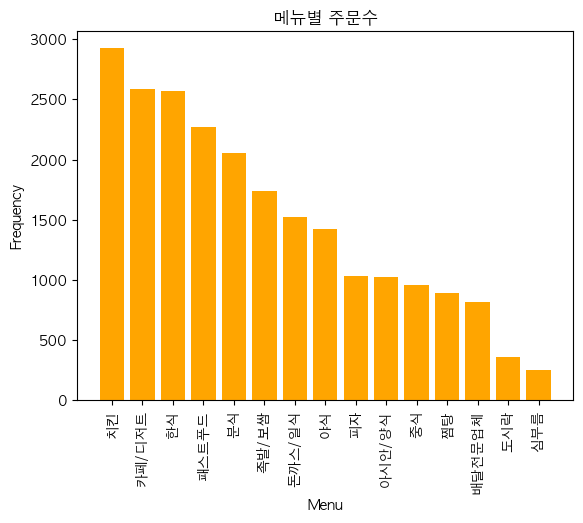

In [51]:
value_counts = data['menu'].value_counts()

plt.bar(value_counts.index, value_counts.values, color='orange')

plt.xlabel('Menu')
plt.ylabel('Frequency')
plt.title('메뉴별 주문수')
plt.xticks(rotation='vertical')

### 주문 시간 KDE(커널 밀도 추정) Plot

In [59]:
#주문 시간으로 kdeplot 그려보기 
#서울 데이터와 전체 데이터를 비교해보고자 했다.

plt.figure(figsize = (12, 5))

sns.set_style("darkgrid")
p1=sns.kdeplot(seoul['hour'], bw=.09, shade = True, color = 'green')
p2=sns.kdeplot(data['hour'],bw=.z09, shade=True, color ='black')
plt.legend(['seoul', 'whole'])
plt.xlim(0,24)
plt.xticks(range(0,24))

NameError: name 'seoul' is not defined

<Figure size 1200x500 with 0 Axes>

시간대별 주문 밀도는 18시가 가장 많고, 그다음 19시, 17시 순이다. 주로 저녁 시간대가 주문이 몰림. 

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/site-packages/matplotlib/pyplot.py'>

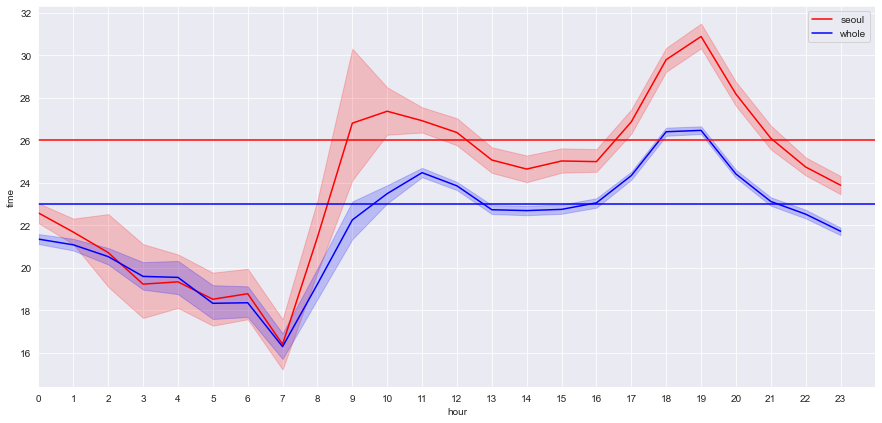

In [20]:
#x축은 주문 시간, y축은 배달 소요 시간으로 lineplot
#오전 중에는 11-12시, 오후 중에는 18시가 배달 소요 시간이 가장 길다

mean_time = int(np.mean(seoul['time']))
total_mean_time = int(np.mean(data['time']))

plt.figure(figsize = (15, 7))


p1=sns.lineplot(x = 'hour', y='time', data=seoul, color ='red' )
p2=sns.lineplot(x='hour', y='time', data=data, color = 'blue')

plt.axhline(mean_time,label='Seoul Mean', color ='red')
plt.axhline(total_mean_time,label='Total Mean', color ='blue')

plt.legend(['seoul', 'whole'])
plt.xlim(0,24)
plt.xticks(range(0,24))
plt

<AxesSubplot:xlabel='hour', ylabel='time'>

/usr/local/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49885 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50556 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 52824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 53416 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54056 missing from current font.
  font.set_

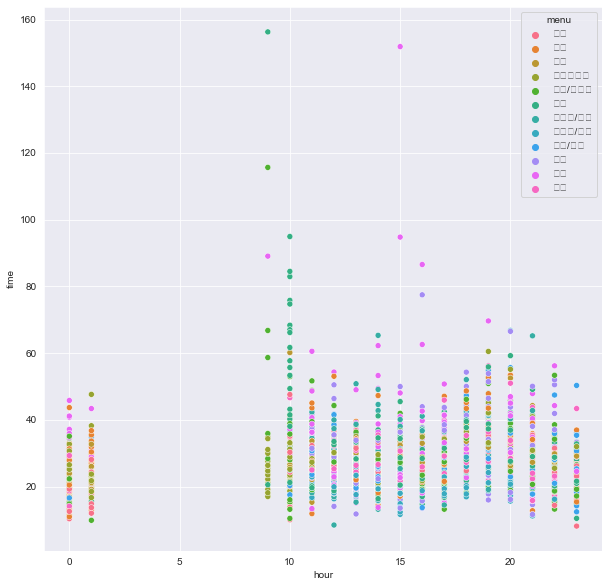

In [23]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='hour', y='time', data=guro, hue='menu')

In [53]:
corr_matrix = data['city'].corr()

TypeError: corr() missing 1 required positional argument: 'other'

### 상관계수 구해보기

In [61]:
data.columns

Index(['date', 'hour', 'menu', 'city', 'time'], dtype='object')

In [65]:
corr = data.corr()
corr

/var/folders/yn/4yp008q55jv19mts19hw5lzc0000gn/T/ipykernel_3704/2601176157.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


,hour,time
hour,1.000000,0.103086
time,0.103086,1.000000
